<a href="https://colab.research.google.com/github/kadilrahman/bitcoin_prediction/blob/master/bitcoin_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wikipedia bitcoin comments

In [ ]:
!pip install mwclient

In [ ]:
import mwclient
import time

site = mwclient.Site("en.wikipedia.org")
page = site.pages["Bitcoin"]

In [ ]:
revs = list(page.revisions())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 1222328354),
             ('parentid', 1222328232),
             ('user', 'A455bcd9'),
             ('timestamp',
              time.struct_time(tm_year=2024, tm_mon=5, tm_mday=5, tm_hour=10, tm_min=38, tm_sec=41, tm_wday=6, tm_yday=126, tm_isdst=-1)),
             ('comment', '')])

In [ ]:
for item in revs[0]:
  print(item)

revid
parentid
user
timestamp
comment


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs = sorted(revs, key = lambda rev: rev["timestamp"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
def find_sentiment (text):
  sent = sentiment_pipeline([text[:250]])[0]
  score = sent ["score"]
  if sent ["label"] == "NEGATIVE":
    score *= -1
  return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be a

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
find_sentiment("slight increase")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.984263002872467

In [ ]:
# Dictionary to hold edit counts and sentiments by date
edits = {}

for rev in revs:
    # Convert the ISO 8601 string timestamp to a struct_time
    date = time.strftime("%Y-%m-%d", rev["timestamp"])

    if date not in edits:
        edits[date] = {'sentiments': [], 'edit_count': 0}

    edits[date]['edit_count'] += 1

    # Some revisions may not have a comment
    comment = rev.get('comment', '')
    if comment:  # Only analyze sentiment if there is a comment
        sentiment_score = find_sentiment(comment)
        edits[date]['sentiments'].append(sentiment_score)

print(edits)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'2009-03-08': {'sentiments': [-0.9905919432640076, -0.9907428622245789, -0.9688861966133118], 'edit_count': 4}, '2009-08-05': {'sentiments': [], 'edit_count': 1}, '2009-08-06': {'sentiments': [0.995745837688446, 0.995745837688446], 'edit_count': 2}, '2009-08-14': {'sentiments': [0.930020809173584], 'edit_count': 1}, '2009-10-13': {'sentiments': [0.5404349565505981, -0.9954361319541931], 'edit_count': 2}, '2009-11-18': {'sentiments': [0.8839505910873413], 'edit_count': 1}, '2009-12-08': {'sentiments': [-0.9869275689125061], 'edit_count': 1}, '2009-12-17': {'sentiments': [-0.9975171089172363], 'edit_count': 1}, '2010-02-23': {'sentiments': [-0.9994946718215942], 'edit_count': 1}, '2010-03-18': {'sentiments': [0.8758773803710938], 'edit_count': 1}, '2010-04-13': {'sentiments': [0.930020809173584, 0.8158009052276611, 0.8158009052276611, 0.8158009052276611], 'edit_count': 4}, '2010-04-15': {'sentiments': [0.930020809173584, 0.8158009052276611, 0.8158009052276611, -0.9969743490219116, 0.815

In [ ]:
from statistics import mean

for key in edits:
  if len(edits[key]["sentiments"]) > 0:
    edits[key]["sentiment"] = mean(edits[key]["sentiments"])
    #percentage of times sentiment was negetive
    edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s < 0]) / len(edits[key]["sentiments"])
  else:
    edits[key]["sentiment"] = 0
    edits[key]["neg_sentiment"] = 0

  del edits[key]["sentiments"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'2009-03-08': {'edit_count': 4,
  'sentiment': -0.9834070007006327,
  'neg_sentiment': 1.0},
 '2009-08-05': {'edit_count': 1, 'sentiment': 0, 'neg_sentiment': 0},
 '2009-08-06': {'edit_count': 2,
  'sentiment': 0.995745837688446,
  'neg_sentiment': 0.0},
 '2009-08-14': {'edit_count': 1,
  'sentiment': 0.930020809173584,
  'neg_sentiment': 0.0},
 '2009-10-13': {'edit_count': 2,
  'sentiment': -0.22750058770179749,
  'neg_sentiment': 0.5},
 '2009-11-18': {'edit_count': 1,
  'sentiment': 0.8839505910873413,
  'neg_sentiment': 0.0},
 '2009-12-08': {'edit_count': 1,
  'sentiment': -0.9869275689125061,
  'neg_sentiment': 1.0},
 '2009-12-17': {'edit_count': 1,
  'sentiment': -0.9975171089172363,
  'neg_sentiment': 1.0},
 '2010-02-23': {'edit_count': 1,
  'sentiment': -0.9994946718215942,
  'neg_sentiment': 1.0},
 '2010-03-18': {'edit_count': 1,
  'sentiment': 0.8758773803710938,
  'neg_sentiment': 0.0},
 '2010-04-13': {'edit_count': 4,
  'sentiment': 0.8443558812141418,
  'neg_sentiment': 0.

In [ ]:
import pandas as pd

edits_df = pd.DataFrame.from_dict(edits, orient = "index")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,-0.983407,1.000000
2009-08-05,1,0.000000,0.000000
2009-08-06,2,0.995746,0.000000
2009-08-14,1,0.930021,0.000000
2009-10-13,2,-0.227501,0.500000
...,...,...,...
2024-04-21,2,-0.997940,1.000000
2024-04-27,3,-0.333276,0.666667
2024-04-30,4,-0.988488,1.000000
2024-05-04,2,-0.004142,0.500000


In [ ]:
edits_df.index = pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,-0.983407,1.000000
2009-08-05,1,0.000000,0.000000
2009-08-06,2,0.995746,0.000000
2009-08-14,1,0.930021,0.000000
2009-10-13,2,-0.227501,0.500000
...,...,...,...
2024-04-21,2,-0.997940,1.000000
2024-04-27,3,-0.333276,0.666667
2024-04-30,4,-0.988488,1.000000
2024-05-04,2,-0.004142,0.500000


In [ ]:
from datetime import datetime

dates = pd.date_range(start="2009-03-08", end=datetime.today())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dates


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29',
               '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03',
               '2024-05-04', '2024-05-05'],
              dtype='datetime64[ns]', length=5538, freq='D')

In [ ]:
edits_df = edits_df.reindex(dates, fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,-0.983407,1.0
2009-03-09,0,0.000000,0.0
2009-03-10,0,0.000000,0.0
2009-03-11,0,0.000000,0.0
2009-03-12,0,0.000000,0.0


In [ ]:
rolling_edits = edits_df.rolling(30).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,NaN,NaN,NaN
2009-03-09,NaN,NaN,NaN
2009-03-10,NaN,NaN,NaN
2009-03-11,NaN,NaN,NaN
2009-03-12,NaN,NaN,NaN
...,...,...,...
2024-05-01,0.500000,-0.166269,0.205556
2024-05-02,0.500000,-0.166269,0.205556
2024-05-03,0.433333,-0.166213,0.188889
2024-05-04,0.466667,-0.136080,0.172222


In [ ]:
if rolling_edits["edit_count"].isna().any():
    non_na_count = rolling_edits["edit_count"].count()
    print(non_na_count)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5509


In [ ]:
rolling_edits = rolling_edits.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.032780,0.033333
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-05-01,0.500000,-0.166269,0.205556
2024-05-02,0.500000,-0.166269,0.205556
2024-05-03,0.433333,-0.166213,0.188889
2024-05-04,0.466667,-0.136080,0.172222


In [ ]:
if rolling_edits["edit_count"].isna().any():
    non_na_count = rolling_edits["edit_count"].count()
    print(non_na_count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits.to_csv("wikipedia_edits.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bitcoin Data

In [ ]:
import yfinance as yf
import os
import pandas as pd


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc_ticker = yf.Ticker("BTC-USD")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc = btc_ticker.history(period="max")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-01 00:00:00+00:00,60609.496094,60780.500000,56555.292969,58254.011719,48439780271,0.0,0.0
2024-05-02 00:00:00+00:00,58253.703125,59602.296875,56937.203125,59123.433594,32711813559,0.0,0.0
2024-05-03 00:00:00+00:00,59122.300781,63320.503906,58848.312500,62889.835938,33172023048,0.0,0.0


In [ ]:
btc.index = pd.to_datetime(btc.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
del btc["Dividends"]
del btc["Stock Splits"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc.columns = [c.lower() for c in btc.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

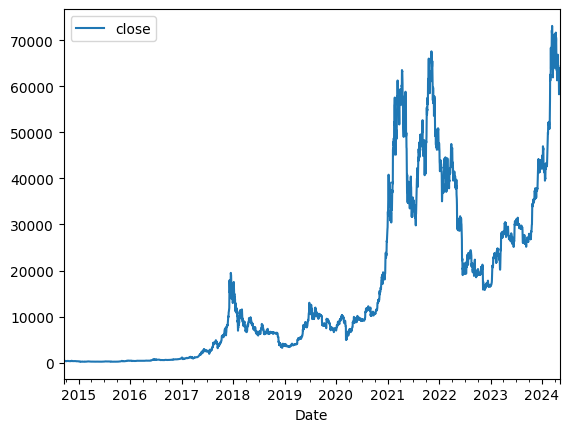

In [ ]:
btc.plot.line(y="close", use_index=True)

In [ ]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col = 0, parse_dates=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.032780,0.033333
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-05-01,0.500000,-0.166269,0.205556
2024-05-02,0.500000,-0.166269,0.205556
2024-05-03,0.433333,-0.166213,0.188889
2024-05-04,0.466667,-0.136080,0.172222


In [ ]:
print(btc.index.tz)
print(wiki.index.tz)

UTC
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc.index = btc.index.tz_localize(None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc = btc.merge(wiki, left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.292484,0.568057
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.293053,0.568057
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.323301,0.601390
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.292914,0.584723
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.292837,0.584723
...,...,...,...,...,...,...,...,...
2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,48439780271,0.500000,-0.166269,0.205556
2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,32711813559,0.500000,-0.166269,0.205556
2024-05-03,59122.300781,63320.503906,58848.312500,62889.835938,33172023048,0.433333,-0.166213,0.188889
2024-05-04,62891.031250,64494.957031,62599.351562,63891.472656,20620477992,0.466667,-0.136080,0.172222


In [ ]:
btc["tomorrow"] = btc["close"].shift(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc["target"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
1    1865
0    1654
Name: count, dtype: int64

# Model

## Baseline ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
train = btc.iloc[:-200]
test = btc[-200:]
predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]

model.fit(train[predictors], train["target"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)
precision_score(test["target"], preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5454545454545454

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)
precision_score(test["target"], preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5454545454545454

In [ ]:
def backtest(data, model, predictors, start = 1095, step = 150):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i : (i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict(train, test, predictors, model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2023-10-19,1,0
2023-10-20,1,0
2023-10-21,1,0
2023-10-22,1,0
2023-10-23,1,0
...,...,...
2024-05-01,1,1
2024-05-02,1,0
2024-05-03,1,0
2024-05-04,0,0


In [ ]:
backtest(btc, model, predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2017-09-16,0,1
2017-09-17,1,1
2017-09-18,0,1
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-05-01,1,1
2024-05-02,1,0
2024-05-03,1,0
2024-05-04,0,1


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 1, learning_rate=0.1, n_estimators = 200)
predictions = backtest(btc, model, predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,1
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-05-01,1,1
2024-05-02,1,0
2024-05-03,1,0
2024-05-04,0,1


In [ ]:
precision_score(predictions["target"], predictions["predictions"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5015082956259427

## Deep learning

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert your dataframe 'btc' to numpy arrays for processing
X = btc[predictors].values
y = btc['target'].values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = Sequential([
      Dense(128, activation='relu', input_dim=X_train.shape[1]),
      Dropout(0.5),
      Dense(64, activation="relu"),
      Dropout(0.5),
      Dense(64, activation="relu"),
      Dropout(0.5),
      Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


88/88 [==============================] - 3s 9ms/step - loss: 0.7188 - accuracy: 0.5112 - val_loss: 0.6908 - val_accuracy: 0.5298
Epoch 2/50
88/88 [==============================] - 1s 6ms/step - loss: 0.7040 - accuracy: 0.4995 - val_loss: 0.6904 - val_accuracy: 0.5355
Epoch 3/50
88/88 [==============================] - 1s 7ms/step - loss: 0.6958 - accuracy: 0.5375 - val_loss: 0.6912 - val_accuracy: 0.5369
Epoch 4/50
88/88 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.5094 - val_loss: 0.6912 - val_accuracy: 0.5185
Epoch 5/50
88/88 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.5247 - val_loss: 0.6914 - val_accuracy: 0.5199
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5233 - val_loss: 0.6919 - val_accuracy: 0.5185
Epoch 7/50
88/88 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5311 - val_loss: 0.6916 - val_accuracy: 0.5199
Epoch 8/50
88/88 [=============

In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5213
Test Accuracy: 0.5213068127632141


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import precision_score

# Predict probabilities
pred_probs = model.predict(X_test)  # Ensure that X_test is prepared similarly to X_train (e.g., scaled)

# Convert probabilities to class predictions based on a threshold
pred_classes = (pred_probs > 0.5).astype(int)

# Calculate precision
precision = precision_score(y_test, pred_classes)
print("Precision:", precision)


22/22 [==============================] - 0s 1ms/step
Precision: 0.5206258890469416


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Complex NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


88/88 [==============================] - 3s 8ms/step - loss: 21.7518 - accuracy: 0.4945 - val_loss: 12.7413 - val_accuracy: 0.5327
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 8.2126 - accuracy: 0.5126 - val_loss: 4.8487 - val_accuracy: 0.5284
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 3.7967 - accuracy: 0.4966 - val_loss: 2.8915 - val_accuracy: 0.5256
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 2.5238 - accuracy: 0.5108 - val_loss: 2.1189 - val_accuracy: 0.4673
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 1.8830 - accuracy: 0.5140 - val_loss: 1.6274 - val_accuracy: 0.4688
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 1.5068 - accuracy: 0.5172 - val_loss: 1.3424 - val_accuracy: 0.4801
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 1.2834 - accuracy: 0.5172 - val_loss: 1.1557 - val_accuracy: 0.5341
Epoch 8/100
88/88 [====

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 0s 2ms/step - loss: 0.7401 - accuracy: 0.5199
Test Accuracy: 0.5198863744735718


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
